===== Student Data Summary =====

   Student_ID   Name  Maths  Science  English  Attendance  Total    Average  \
0           1  Rahul     78       82       74          92    234  78.000000   
1           2    Anu     56       64       70          80    190  63.333333   
2           3  Kiran     88       90       85          78    263  87.666667   
3           4  Sneha     45       50       60          72    155  51.666667   
4           5  Manoj     67       72       68          85    207  69.000000   
5           6   Asha     92       89       94          98    275  91.666667   
6           7   Ravi     58       62       55          75    175  58.333333   

  Result  
0   Pass  
1   Pass  
2   Pass  
3   Pass  
4   Pass  
5   Pass  
6   Pass  

===== Top Performer =====

Student_ID            6
Name               Asha
Maths                92
Science              89
English              94
Attendance           98
Total               275
Average       91.666667
Result             Pass
N

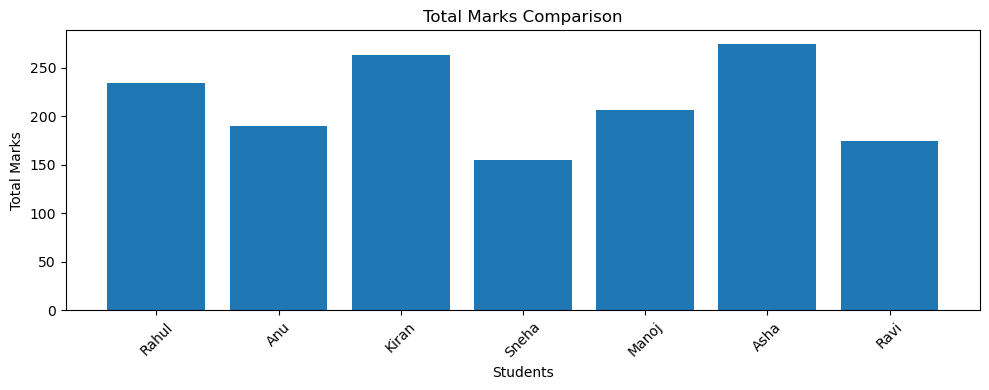

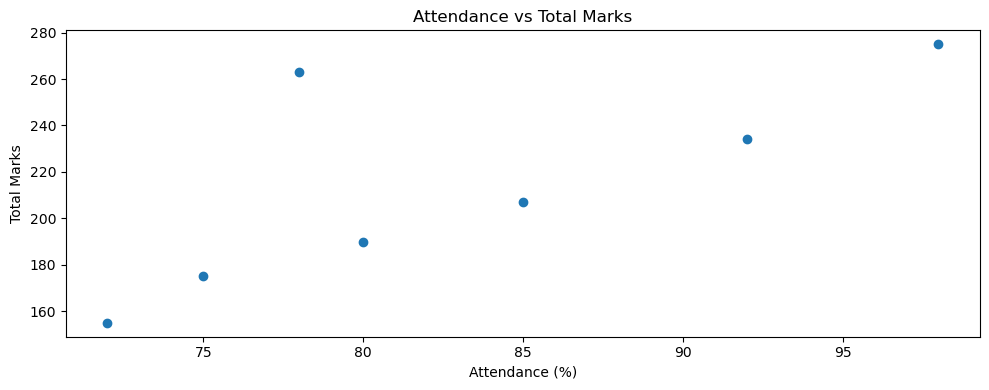

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("student.csv/student.csv")

# Make sure required columns exist
required_cols = ["Maths", "Science", "English", "Name", "Attendance"]
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing column in CSV: {col}")

# 1. Total & Average Marks
df["Total"] = df[["Maths", "Science", "English"]].sum(axis=1)
df["Average"] = df["Total"] / 3

# 2. Pass/Fail Column (Pass if all subjects >= 40)
df["Result"] = df.apply(
    lambda row: "Pass" 
    if (row["Maths"] >= 40 and row["Science"] >= 40 and row["English"] >= 40) 
    else "Fail", 
    axis=1
)

# 3. Top Student
top_student = df.loc[df["Total"].idxmax()]

# 4. Weak Student
weak_student = df.loc[df["Total"].idxmin()]

# 5. Print Summary
print("===== Student Data Summary =====\n")
print(df)
print("\n===== Top Performer =====\n")
print(top_student)
print("\n===== Weak Performer =====\n")
print(weak_student)

# 6. Plot - Total Marks Bar Graph
plt.figure(figsize=(10,4))
plt.bar(df["Name"], df["Total"])
plt.title("Total Marks Comparison")
plt.xlabel("Students")
plt.ylabel("Total Marks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Attendance vs Marks Scatter Plot
plt.figure(figsize=(10,4))
plt.scatter(df["Attendance"], df["Total"])
plt.title("Attendance vs Total Marks")
plt.xlabel("Attendance (%)")
plt.ylabel("Total Marks")
plt.tight_layout()
plt.show()